In [1]:
# Importamos las librerías que necesitamos
# 
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest


# Configuraciones
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Ahora puedo unir los dos dataframes. Lo haremos con merge, usando la columna común Loyalty Number y con un left join. 

In [2]:
# De cara a unir las tablas, usaremos un merge con la columna común Loyalty Number 

df_CFA = pd.read_csv('datos_limpios_CFA.csv', index_col=0)   # (403760, 12)

df_CLH = pd.read_csv('datos_limpios_CLH.csv', index_col=0)   # (16737, 16)

In [3]:
df = pd.merge(left=df_CFA, right=df_CLH, on= "Loyalty Number", how='left')

In [4]:
df.shape   

(403760, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Points Accumulate            403760 non-null  int64  
 11  id_year_month                403760 non-null  object 
 12  Country                      403760 non-null  object 
 13 

Vuelvo a cambiar los tipos de las columnas a object.

In [6]:
df['Loyalty Number'] = df['Loyalty Number'].astype('object')
df['Year'] = df['Year'].astype('object')
df['Month'] = df['Month'].astype('object')

In [7]:
df.dtypes

Loyalty Number                  object
Year                            object
Month                           object
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Points Accumulate                int64
id_year_month                   object
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year        

In [8]:
df.isnull().sum()[df.isnull().sum()>0] # Estudiamos valores nulos. 

Salary    102260
dtype: int64

In [9]:
# Hay 102260 nulos en Salary.

total_nulos = df.isnull().sum()[df.isnull().sum()>0]
total_nulos

Salary    102260
dtype: int64

In [10]:
proporcion_nulos = 100*np.round(total_nulos/df.shape[0], 2)
proporcion_nulos

Salary    25.0
dtype: float64

Hay un 25% de nulos en la columna 'Salary'. Son demasiados. 

In [11]:
df['Salary'].describe()

count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: Salary, dtype: float64

Alertados por el estadístico min = -58486, identificamos que hay 480 valores negativos.

In [12]:
df['Salary'][df['Salary']<0]

291      -10605.0
956      -58486.0
1716     -31911.0
2081     -49001.0
2433     -46683.0
           ...   
398813   -46303.0
399884   -34079.0
402017   -57297.0
402459   -17534.0
403021   -12497.0
Name: Salary, Length: 480, dtype: float64

Los pasamos a positivo, pero sigue habiendo nulos.

In [13]:
df['Salary'] = df['Salary'].apply(lambda x: abs(x))

In [14]:
df['Salary'][df['Salary']<0] 

Series([], Name: Salary, dtype: float64)

In [15]:
df['Salary'].isnull().sum()

102260

Buscamos valores atípicos con visualización.

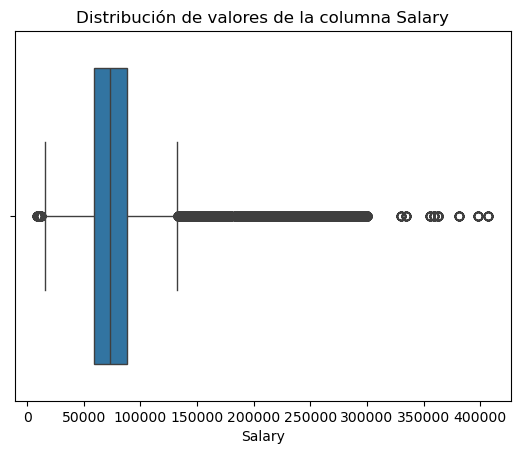

In [16]:
# Por los datos se intuyen algunos outliers en las columnas, pero veremos mejor si tenemos valores atípicos con visualización. 

sns.boxplot(x = 'Salary', data = df)

plt.title("Distribución de valores de la columna Salary");

Hay muchos atípicos. Imputaremos los nulos con imputación compleja.

In [17]:
# Método IterativeImputer del módulo impute de scikit-learn
    
imputer = IterativeImputer(max_iter= 20, random_state=42)

imputer_iterative_imputado = imputer.fit_transform(df[['Salary']])

imputer_iterative_imputado

array([[92552.        ],
       [79371.73290216],
       [79371.73290216],
       ...,
       [47670.        ],
       [79371.73290216],
       [46594.        ]])

Lo suyo sería imputar con INN y KNN y quedarnos con el que menos modifique los estadísticos de la distribución original.

Sin embargo, con la cantidad de datos tan grande que tenemos, KNN tarda mucho y mejor voy a avanzar.

Me quedo directamente con la imputación de Interactiva Imputer. 

In [18]:
df['Salary'] = imputer_iterative_imputado
df['Salary']

0          92552.000000
1          79371.732902
2          79371.732902
3          63253.000000
4          91163.000000
              ...      
403755     79371.732902
403756    217943.000000
403757     47670.000000
403758     79371.732902
403759     46594.000000
Name: Salary, Length: 403760, dtype: float64

In [19]:
df.isnull().sum()[df.isnull().sum()>0] # Compruebo que ya no tengo nulos.

Series([], dtype: int64)

In [20]:
df.to_csv("datos_aerolinea.csv")